In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd
import seaborn as sns
%matplotlib inline

In [87]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# most_runs_average_strikerate.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
dataset=pd.read_csv('D:/Tequed lab project/data set/most_runs_average_strikerate.csv', delimiter=',', nrows = nRowsRead)
dataset.dataframeName = 'most_runs_average_strikerate.csv'
nRow, nCol = dataset.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 516 rows and 6 columns


In [88]:
dataset.head(5)

,batsman,out,numberofballs,average,strikerate,total_runs
0,V Kohli,152,4111,35.697368,131.987351,5426
1,SK Raina,160,3916,33.662500,137.538304,5386
2,RG Sharma,161,3742,30.447205,130.999466,4902
3,DA Warner,114,3292,41.377193,143.286756,4717
4,S Dhawan,137,3665,33.583942,125.538881,4601


In [7]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [14]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
    

In [8]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [9]:
plotPerColumnDistribution(df3, 10, 5)

<Figure size 2400x512 with 0 Axes>

In [80]:
dataset.shape

(516, 6)

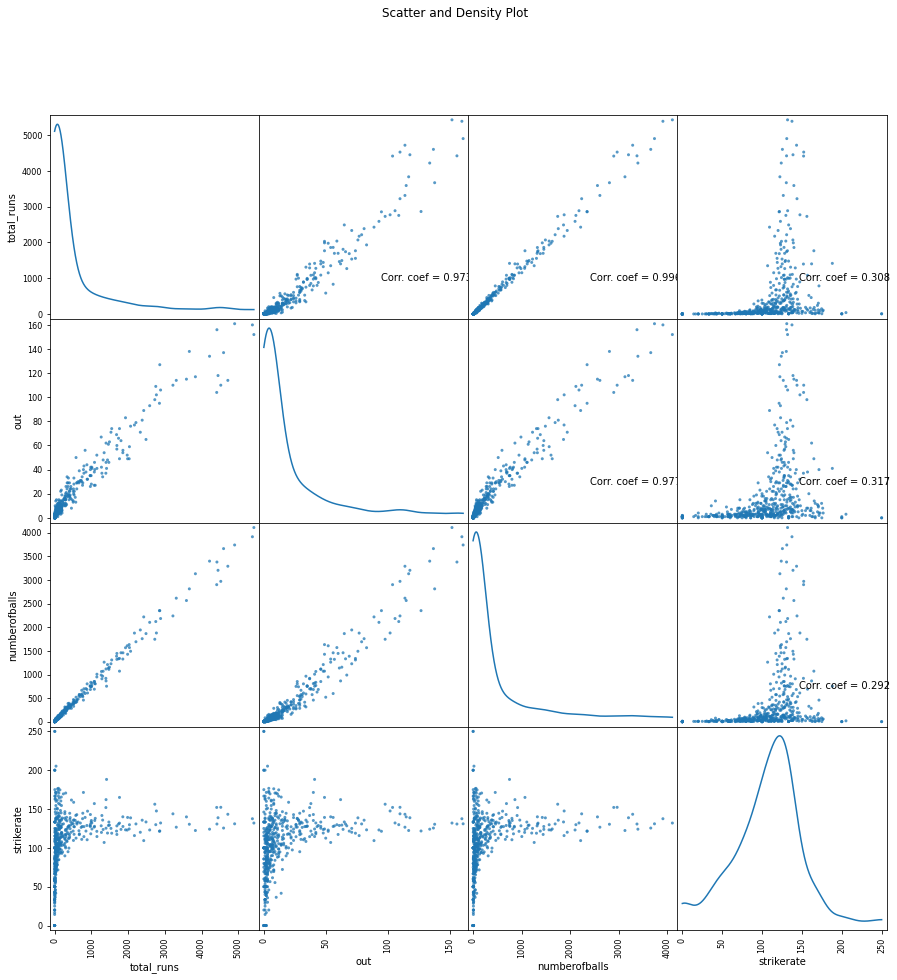

In [16]:
plotScatterMatrix(df3, 15, 10)

C:\Users\mayur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


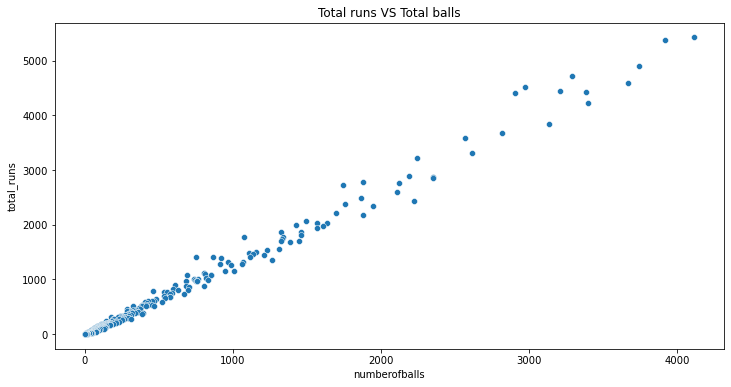

In [18]:
plt.figure(figsize=(12,6))
plt.title('Total runs VS Total balls')
sns.scatterplot(df3.numberofballs, df3.total_runs);

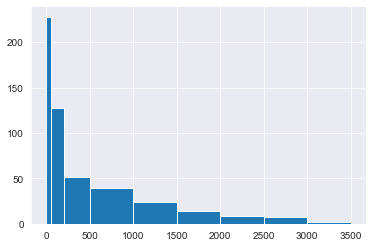

In [89]:
sns.set_style("darkgrid")
plt.hist(dataset.total_runs, bins=[0,50,200,500,1000,1500,2000,2500,3000,3500]);

C:\Users\mayur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


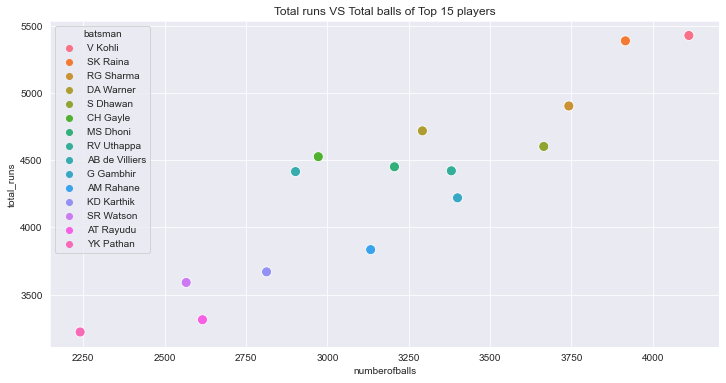

In [48]:
most_runs_df = dataset.sort_values(by='total_runs',ascending=False)
most_df=most_runs_df.head(15)
plt.figure(figsize=(12,6))
plt.title('Total runs VS Total balls of Top 15 players')
sns.scatterplot(most_df.numberofballs,most_df.total_runs,hue=most_df.batsman,s=100);

C:\Users\mayur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


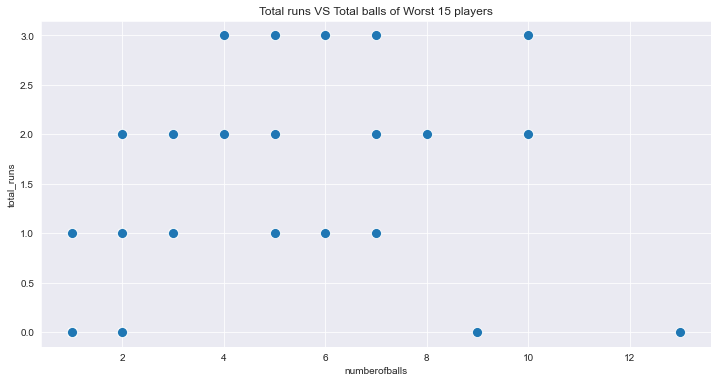

In [21]:
most_runs_df = dataset.sort_values(by='total_runs',ascending=True)
least_df=most_runs_df.head(50)
plt.figure(figsize=(12,6))
plt.title('Total runs VS Total balls of Worst 15 players')
sns.scatterplot(least_df.numberofballs,least_df.total_runs,s=100);

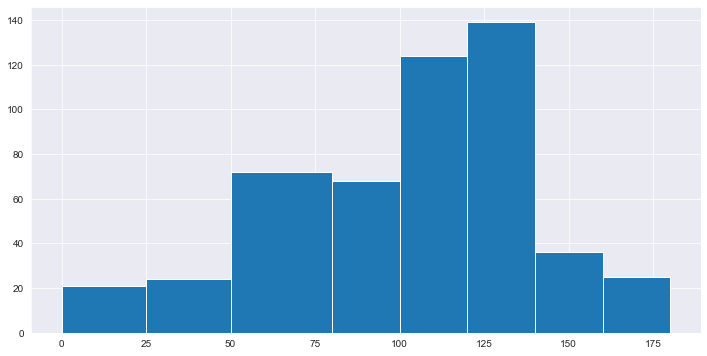

In [49]:
plt.figure(figsize=(12,6))
plt.hist(dataset.strikerate, bins=[0,25,50,80,100,120,140,160,180]);

C:\Users\mayur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Top players with best average'}, xlabel='average', ylabel='batsman'>

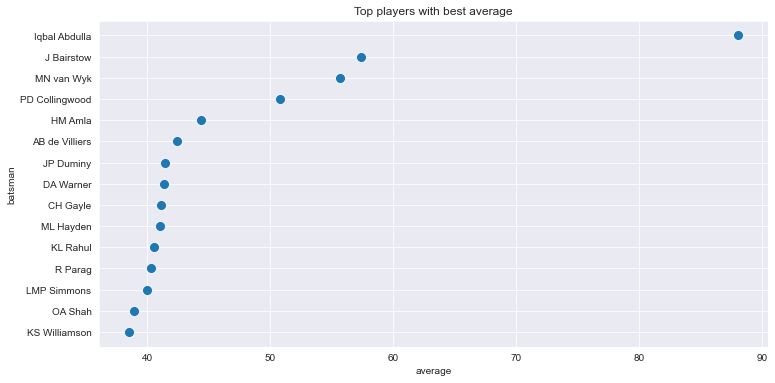

In [50]:
mostt_runs_df = dataset.sort_values(by='average',ascending=False)
mosttt_df=mostt_runs_df.head(15)
plt.figure(figsize=(12,6))
plt.title('Top players with best average')
sns.scatterplot(mosttt_df.average,mosttt_df.batsman,s=100)

Text(0.5, 1.0, 'Run VS Balls')

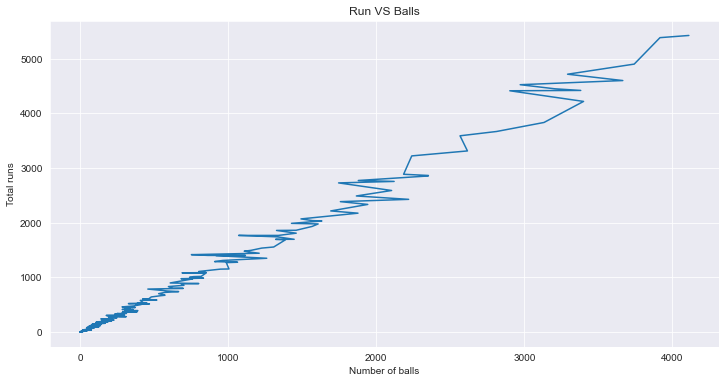

In [65]:
plt.figure(figsize=(12,6))
plt.plot(dataset.numberofballs, dataset.total_runs)


plt.xlabel('Number of balls')
plt.ylabel('Total runs')

plt.title("Run VS Balls")

C:\Users\mayur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


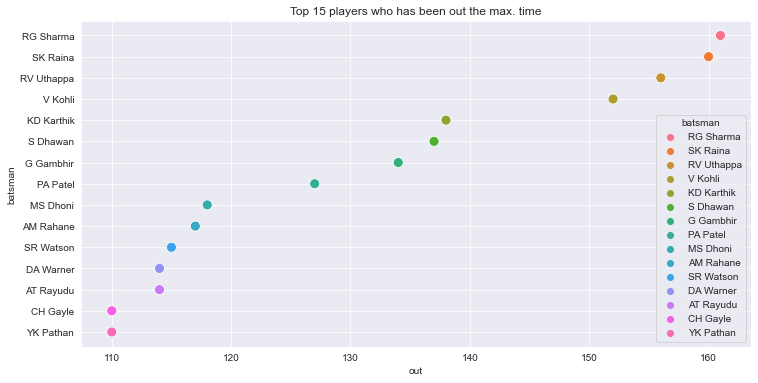

In [66]:
out_df = dataset.sort_values(by='out',ascending=False)
outt_df=out_df.head(15)
plt.figure(figsize=(12,6))
plt.title('Top 15 players who has been out the max. time')
sns.scatterplot(outt_df.out,outt_df.batsman,hue=outt_df.batsman,s=100);

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<AxesSubplot:xlabel='batsman'>

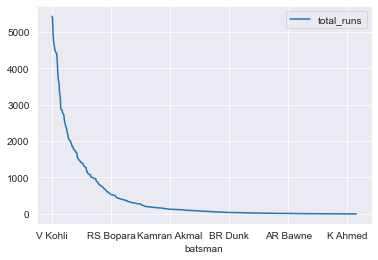

In [70]:
dataset.plot("batsman", "total_runs")

In [ ]:
#numpy is a number manipulation librarry(using large data which is in our dataset)
#scikit-learn contains all machine learning packages

In [71]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [72]:
dataset=pd.read_csv('D:/Tequed lab project/data set/most_runs_average_strikerate.csv')

In [90]:
print(dataset)

            batsman  out  numberofballs    average  strikerate  total_runs
0           V Kohli  152           4111  35.697368  131.987351        5426
1          SK Raina  160           3916  33.662500  137.538304        5386
2         RG Sharma  161           3742  30.447205  130.999466        4902
3         DA Warner  114           3292  41.377193  143.286756        4717
4          S Dhawan  137           3665  33.583942  125.538881        4601
..              ...  ...            ...        ...         ...         ...
511        ND Doshi    1             13   0.000000    0.000000           0
512         J Denly    1              1   0.000000    0.000000           0
513         S Ladda    2              9   0.000000    0.000000           0
514  V Pratap Singh    1              1   0.000000    0.000000           0
515       S Kaushik    1              1   0.000000    0.000000           0

[516 rows x 6 columns]


In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
dataset=pd.read_csv('D:/Tequed lab project/data set/most_runs_average_strikerate.csv')

print(dataset)


           batsman  out  numberofballs    average  strikerate  total_runs
0          V Kohli  152           4111  35.697368  131.987351        5426
1         SK Raina  160           3916  33.662500  137.538304        5386
2        RG Sharma  161           3742  30.447205  130.999466        4902
3        DA Warner  114           3292  41.377193  143.286756        4717
4         S Dhawan  137           3665  33.583942  125.538881        4601
..             ...  ...            ...        ...         ...         ...
303    DJ Thornely    3             52  13.000000   75.000000          39
304       MM Patel    5             41   7.800000   95.121951          39
305     SP Jackson    2             31  19.000000  122.580645          38
306      JO Holder    5             31   7.600000  122.580645          38
307  Anureet Singh    4             46   9.250000   80.434783          37

[308 rows x 6 columns]


In [22]:
x=dataset.iloc[:,1:4].values
y=dataset.iloc[:,5].values
print(x)
print(y)

[[1.52000000e+02 4.11100000e+03 3.56973684e+01]
 [1.60000000e+02 3.91600000e+03 3.36625000e+01]
 [1.61000000e+02 3.74200000e+03 3.04472050e+01]
 [1.14000000e+02 3.29200000e+03 4.13771930e+01]
 [1.37000000e+02 3.66500000e+03 3.35839416e+01]
 [1.10000000e+02 2.97200000e+03 4.11363636e+01]
 [1.18000000e+02 3.20600000e+03 3.77118644e+01]
 [1.56000000e+02 3.38100000e+03 2.83333333e+01]
 [1.04000000e+02 2.90200000e+03 4.24423077e+01]
 [1.34000000e+02 3.40000000e+03 3.14850746e+01]
 [1.17000000e+02 3.13300000e+03 3.27692308e+01]
 [1.38000000e+02 2.81300000e+03 2.65869565e+01]
 [1.15000000e+02 2.56600000e+03 3.12173913e+01]
 [1.14000000e+02 2.61600000e+03 2.90614035e+01]
 [1.10000000e+02 2.24000000e+03 2.92909091e+01]
 [1.06000000e+02 2.18500000e+03 2.72264151e+01]
 [1.27000000e+02 2.35200000e+03 2.25511811e+01]
 [9.50000000e+01 2.35200000e+03 3.00526316e+01]
 [1.02000000e+02 1.87900000e+03 2.71764706e+01]
 [1.09000000e+02 2.12100000e+03 2.52752294e+01]
 [9.80000000e+01 1.74600000e+03 2.783673

In [115]:
dataset.isnull()

,batsman,out,numberofballs,average,strikerate,total_runs
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
511,False,False,False,False,False,False
512,False,False,False,False,False,False
513,False,False,False,False,False,False
514,False,False,False,False,False,False


In [11]:
dataset.isnull().sum()

batsman          0
out              0
numberofballs    0
average          0
strikerate       0
total_runs       0
dtype: int64

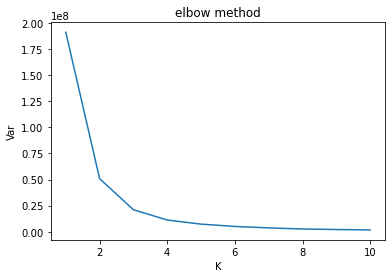

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
dataset = pd.read_csv('D:/Tequed lab project/data set/most_runs_average_strikerate.csv')
dataset = dataset.reset_index()
X = dataset.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('K')
plt.ylabel('Var')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)


from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)
print(y_pred)

[ 393.98812369  101.87789565  180.70172353  135.28773781 1159.48399159
  527.78425735 1211.04544545  217.6309275   533.63569771 2077.26360992
 1069.53988628  156.04733318  334.35940063   87.03941078 1505.87547243
   50.3721636  1594.39556588 1732.44933246   54.79684215 1654.80306866
  246.72753588   87.0513244   254.02453907  126.91692153   83.46659285
  680.76869945 2330.48575595   57.1199983   384.24606341 1077.38473935
   49.89484502 1833.48033673  695.99730099  119.20255351   70.54012242
   96.24271133   33.37365052   21.41333879   34.57586609  238.60879846
  192.74707904  249.84621045   10.68572549   48.48668714 1250.20661339
 2779.79433852 1017.91623866   52.09995667  370.55914358  201.44337458
 1469.3680356    24.09842178  482.71513336   13.65333178   49.77619532
   21.16790997  174.75371164   -7.90191446   55.23032259  110.10403022
   98.57739814   36.58874155]
